# Analyse des dialogues dans l'Avare de Molière

Auteur : Emile Pierret

Nous proposons d'étudier la part de dialogue de chacun des personnages de l'Avare de Molière.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os

In [2]:
os.getcwd()

'/home/jovyan/work/module3/exo3'

In [3]:
data_url = "http://dramacode.github.io/markdown/moliere_avare.txt"

In [4]:
fichier = open("moliere_avare.txt", "r")

In [5]:
fichier

<_io.TextIOWrapper name='moliere_avare.txt' mode='r' encoding='UTF-8'>

In [6]:
lignes = fichier.readlines()

In [7]:
k = 0
while lignes[k] != '# ACTEURS.\n' :
    k +=1

In [8]:
lignes[k]

'# ACTEURS.\n'

In [9]:
for k in range(19,33) :
    print(lignes[k])

 – Harpagon, Père de Cléante et d'Élise, et Amoureux de Mariane.

 – Cléante, Fils d'Harpagon, Amant de Mariane.

 – Élise, Fille d'Harpagon, Amante de Valère.

 – Valère, Fils d'Anselme, et Amant d'Élise.

 – Mariane, Amante de Cléante, et aimée d'Harpagon.

 – Anselme, Père de Valère et de Mariane.

 – Frosine, Femme d'Intrigue.

 – Maitre Simon, Courtier.

 – Maitre Jacques, Cuisinier et Cocher d'Harpagon.

 – La Flèche, Valet de Cléante.

 – Dame Claude, Servante d'Harpagon.

 – Brindavoine, laquais d'Harpagon.

 – La Merluche, laquais d'Harpagon.

 – Le commissaire, et son clerc.



In [22]:
persos = []
for k in range(19,33) :
    l = lignes[k]
    i = 3
    perso = ""
    while l[i] != "," :
        perso += l[i]
        i+=1
    persos.append("    "+perso.upper()+".\n")
print(persos)
persos[7] = '    MAÎTRE SIMON.\n'
persos[8] = '    MAÎTRE JACQUES.\n'
Nombre_repliques = {}
for perso in persos :
    Nombre_repliques[perso] = 0

Nombre_mots = {}
for perso in persos :
    Nombre_mots[perso] = 0

Nombre_scènes = {}
for perso in persos :
    Nombre_scènes[perso] = 0

Nombre_actes = {}
for perso in persos :
    Nombre_actes[perso] = []

['    HARPAGON.\n', '    CLÉANTE.\n', '    ÉLISE.\n', '    VALÈRE.\n', '    MARIANE.\n', '    ANSELME.\n', '    FROSINE.\n', '    MAITRE SIMON.\n', '    MAITRE JACQUES.\n', '    LA FLÈCHE.\n', '    DAME CLAUDE.\n', '    BRINDAVOINE.\n', '    LA MERLUCHE.\n', '    LE COMMISSAIRE.\n']


In [50]:
dico_acte = {}
acte_courant = 0
for k in range(34,len(lignes)) :
    l = lignes[k]
    if l[:3] == '###' :
        scène_courante += 1
        dico_scènes[scène_courante]= {}
        for perso in persos :
            dico_scènes[scène_courante][perso] = 0
    elif l[:2] == '##' :
        if acte_courant >= 1 :
            dico_acte[acte_courant] = dico_scènes
        scène_courante = 0
        acte_courant += 1
        dico_scènes = {}
    if l in persos :
        Nombre_repliques[l] += 1
        dico_scènes[scène_courante][l] += 1
        Nombre_mots[l] += len(lignes[k+1].split()) #problème ponctuation
        if not (acte_courant in Nombre_actes[l]) :
            Nombre_actes[l].append(acte_courant)
dico_acte[acte_courant] = dico_scènes

In [51]:
Nombre_actes

{'    HARPAGON.\n': [1, 2, 3, 4, 5],
 '    CLÉANTE.\n': [1, 2, 3, 4, 5],
 '    ÉLISE.\n': [1, 3, 4, 5],
 '    VALÈRE.\n': [1, 3, 5],
 '    MARIANE.\n': [3, 4, 5],
 '    ANSELME.\n': [5],
 '    FROSINE.\n': [2, 3, 4, 5],
 '    MAÎTRE SIMON.\n': [2],
 '    MAÎTRE JACQUES.\n': [3, 4, 5],
 '    LA FLÈCHE.\n': [1, 2, 4],
 '    DAME CLAUDE.\n': [],
 '    BRINDAVOINE.\n': [3],
 '    LA MERLUCHE.\n': [3],
 '    LE COMMISSAIRE.\n': [5]}

In [52]:
dict(sorted(Nombre_mots.items(), key=lambda item:item[1]))

{'    DAME CLAUDE.\n': 0,
 '    BRINDAVOINE.\n': 193,
 '    LA MERLUCHE.\n': 255,
 '    MAÎTRE SIMON.\n': 940,
 '    LE COMMISSAIRE.\n': 1439,
 '    ANSELME.\n': 2460,
 '    MARIANE.\n': 4297,
 '    ÉLISE.\n': 4515,
 '    MAÎTRE JACQUES.\n': 6871,
 '    LA FLÈCHE.\n': 7223,
 '    FROSINE.\n': 10224,
 '    VALÈRE.\n': 12759,
 '    CLÉANTE.\n': 16020,
 '    HARPAGON.\n': 26239}

In [53]:
dict(sorted(Nombre_repliques.items(), key=lambda item:item[1]))

{'    DAME CLAUDE.\n': 0,
 '    BRINDAVOINE.\n': 18,
 '    MAÎTRE SIMON.\n': 30,
 '    LA MERLUCHE.\n': 30,
 '    LE COMMISSAIRE.\n': 102,
 '    ANSELME.\n': 120,
 '    MARIANE.\n': 162,
 '    ÉLISE.\n': 300,
 '    FROSINE.\n': 354,
 '    LA FLÈCHE.\n': 384,
 '    MAÎTRE JACQUES.\n': 498,
 '    VALÈRE.\n': 594,
 '    CLÉANTE.\n': 960,
 '    HARPAGON.\n': 2064}

In [54]:
dico_acte

{1: {1: {'    HARPAGON.\n': 0,
   '    CLÉANTE.\n': 0,
   '    ÉLISE.\n': 8,
   '    VALÈRE.\n': 8,
   '    MARIANE.\n': 0,
   '    ANSELME.\n': 0,
   '    FROSINE.\n': 0,
   '    MAÎTRE SIMON.\n': 0,
   '    MAÎTRE JACQUES.\n': 0,
   '    LA FLÈCHE.\n': 0,
   '    DAME CLAUDE.\n': 0,
   '    BRINDAVOINE.\n': 0,
   '    LA MERLUCHE.\n': 0,
   '    LE COMMISSAIRE.\n': 0},
  2: {'    HARPAGON.\n': 0,
   '    CLÉANTE.\n': 10,
   '    ÉLISE.\n': 9,
   '    VALÈRE.\n': 0,
   '    MARIANE.\n': 0,
   '    ANSELME.\n': 0,
   '    FROSINE.\n': 0,
   '    MAÎTRE SIMON.\n': 0,
   '    MAÎTRE JACQUES.\n': 0,
   '    LA FLÈCHE.\n': 0,
   '    DAME CLAUDE.\n': 0,
   '    BRINDAVOINE.\n': 0,
   '    LA MERLUCHE.\n': 0,
   '    LE COMMISSAIRE.\n': 0},
  3: {'    HARPAGON.\n': 34,
   '    CLÉANTE.\n': 0,
   '    ÉLISE.\n': 0,
   '    VALÈRE.\n': 0,
   '    MARIANE.\n': 0,
   '    ANSELME.\n': 0,
   '    FROSINE.\n': 0,
   '    MAÎTRE SIMON.\n': 0,
   '    MAÎTRE JACQUES.\n': 0,
   '    LA FLÈCHE.\n': 3

In [55]:
import matplotlib.pyplot as plt
import numpy as np

ValueError: shape mismatch: objects cannot be broadcast to a single shape

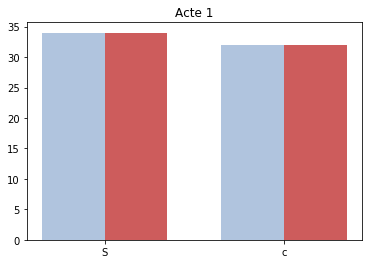

In [64]:
for acte in range(1,6) :
    plt.figure()
    for scene in range(1,len(dico_acte[acte])+1) :
        x = np.zeros()
        labels = []
        for perso in persos :
            if dico_acte[acte][scene][perso] != 0 :
                x.append(dico_acte[acte][scene][perso])
                labels.append(perso)
        plt.title('Acte ' + str(acte))
        #plt.bar(labels,x)
        width = 0.35  # épaisseur de chaque bâton

        # Création du diagramme en bâtons (bâtons côte à côte)
        pos = np.arange(2)
        plt.bar(pos - width/2, x, width, color='lightsteelblue')
        plt.bar(pos + width/2,x, width, color='IndianRed')
        plt.xticks(pos, "Scène "+str(scene))

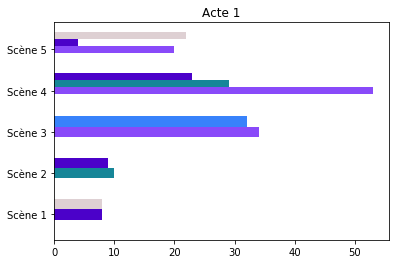

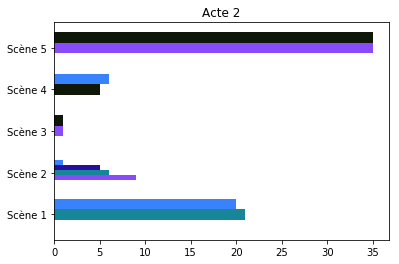

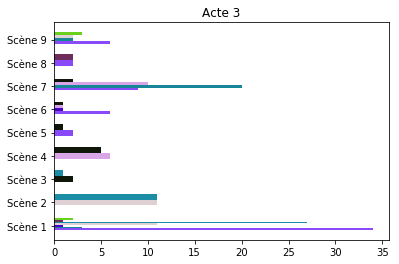

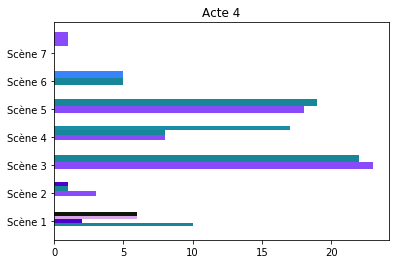

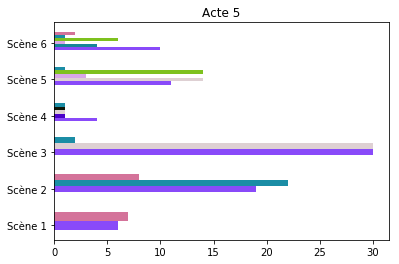

In [129]:
colors = np.random.rand(14,3)
for acte in range(1,6) :
    plt.figure()
    x = np.zeros((len(dico_acte[acte]),len(persos)))
    labels = persos
    for scene in range(1,len(dico_acte[acte])+1) :
        for l,perso in enumerate(persos) :
                x[scene-1,l] += dico_acte[acte][scene][perso]
    plt.title('Acte ' + str(acte))
    #plt.bar(labels,x)
    width = 1/2  # épaisseur de chaque bâton

    # Création du diagramme en bâtons (bâtons côte à côte)
    pos = np.arange(len(dico_acte[acte]))
    for scene in range(1,len(dico_acte[acte])+1) :
        nb_perso = 0
        for l,perso in enumerate(persos) :
            if x[scene-1,l] != 0 :
                nb_perso +=1
        nb = 0
        for l,perso in enumerate(persos) :
            if x[scene-1,l] != 0 :
                nb +=1
            if scene == 1 :
                plt.barh(scene+(nb-nb_perso//2)*width/nb_perso, x[scene-1,l],width/nb_perso,label=persos[l],color=colors[l])
            else :
                plt.barh(scene+(nb-nb_perso//2)*width/nb_perso, x[scene-1,l],width/nb_perso,color=colors[l])
    plt.yticks(np.arange(scene)+1, np.array(["Scène "+str(k) for k in range(1,scene+1)]))